In [4]:
repo_path <- "D:/studia/iml-projekt"

In [44]:
# Required packages
library("data.table")
library("DALEX")
library("DALEXtra")
library("ggplot2")
library("gridExtra")
library("pipeR")

# Jupyter settings
options(repr.plot.width = 12)
options(repr.plot.height = 8)
options(jupyter.rich_display = FALSE)
options(width = 120)

# Paths within the repo
data_path <- file.path(repo_path, "data/survival-data-split")
model_path <- file.path(repo_path, "models/pickles/opt_XGBTRegressor.pickle")

### Reading data and creating explainer

In [ ]:
data$

In [27]:
read_data <- function(data_dir) {
    data_names <- c("X_test", "X_train","y_test", "y_train")
    file_names <- sprintf("survival_%s.csv", data_names)
    paths <- file.path(data_dir, file_names)
    
    setNames(lapply(paths, fread), data_names)
}

extract_treatment <- function(data, idx = ncol(data$X_train)) {
    data <- lapply(data, as.data.frame)
    
    data$treatment_train <- data$X_train[, idx]
    data$X_train <- data$X_train[, -idx]
    
    data$treatment_test <- data$X_test[, idx]
    data$X_test <- data$X_test[, -idx]
    
    lapply(data, as.data.table)
}

In [29]:
data <- extract_treatment(read_data(data_path))

In [59]:
explainer <- explain_scikitlearn(
    model_path,
    data = data$X_train %>>% as.data.frame(),
    y = data$y_train %>>% as.data.frame(),
    label = "XGBTRegressor"
)

Preparation of a new explainer is initiated
  -> model label       :  XGBTRegressor 
  -> data              :  754  rows  11  cols 
  -> target variable   :  Argument 'y' was a data frame. Converted to a vector. (  WARNING  )
  -> target variable   :  754  values 
  -> model_info        :  package reticulate , ver. 1.15 , task regression (  default  ) 
  -> predict function  :  yhat.scikitlearn_model  will be used (  default  )
  -> predicted values  :  predict function returns multiple columns:  2  (  WARNING  ) some of functionalities may not work 
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -2785.254 , mean =  -58.32372 , max =  3061.387  
  A new explainer has been created!  


## Variable Importance

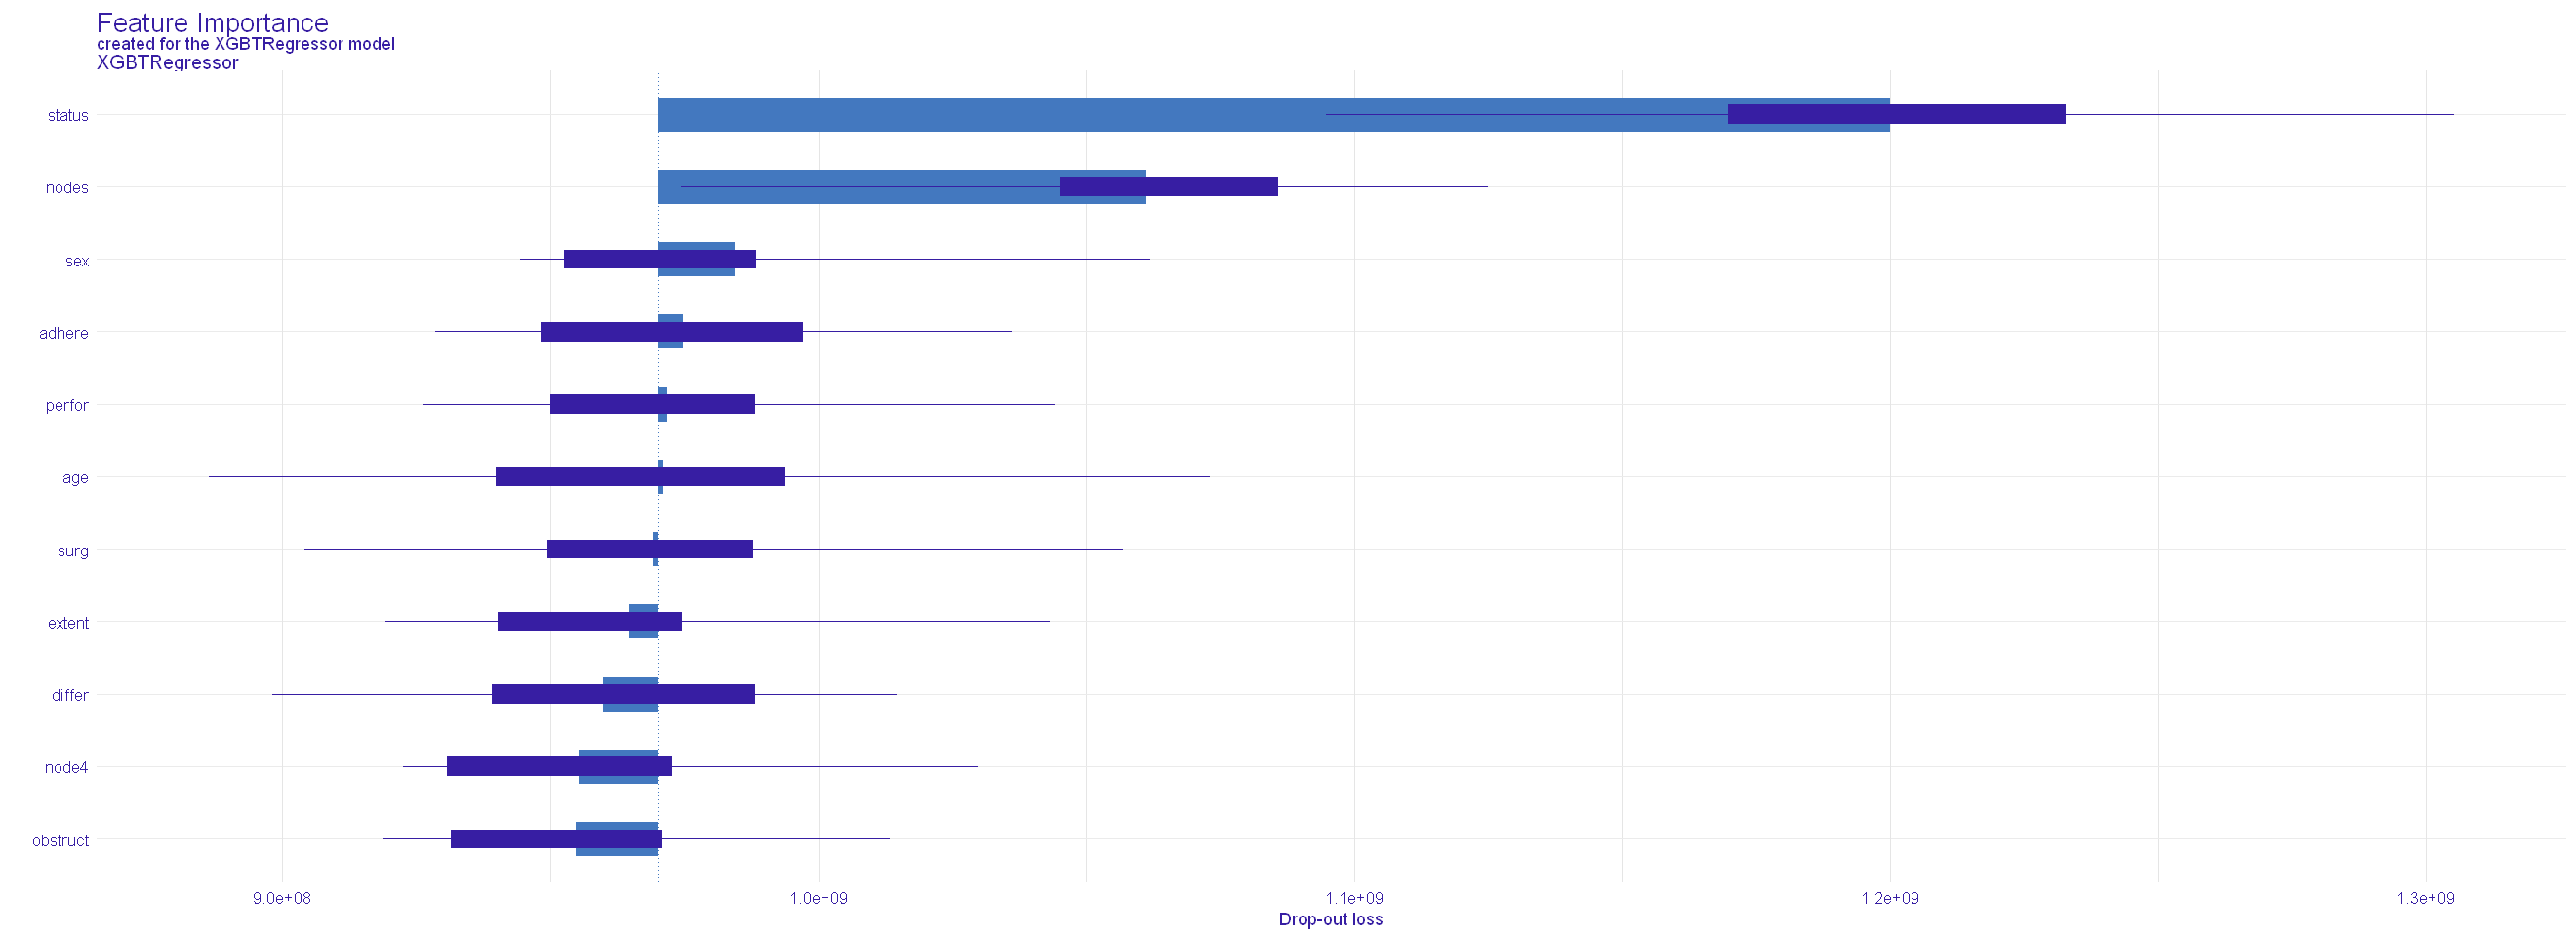

In [60]:
vi <- variable_importance(explainer)
plot(vi)

## Partial Dependence Profiles

In [61]:
plot_pdp <- function(explainer, variables) {
    options("repr.plot.width" = 22)
    
    pdp <- model_profile(explainer, variables)
    plot_avg <- plot(pdp) + ggtitle("Partial Dependence Profile")
    plot_profiles <- plot(pdp, geom = "profiles") + ggtitle("Ceteris Paribus and Partial Dependence Profiles")
    plot_clustered <- plot(model_profile(explainer, "status", k = 3), geom = "profiles") + ggtitle("Clustered Partial Dependence Profiles")
    
    grid.arrange(plot_avg, plot_profiles, plot_clustered, ncol = 3)
}

### `status`

Warning message in model_name[i] <- unique(dfl[[i]]$`_label`):
"liczba pozycji do zastąpienia nie jest wielokrotnością długości zamiany"


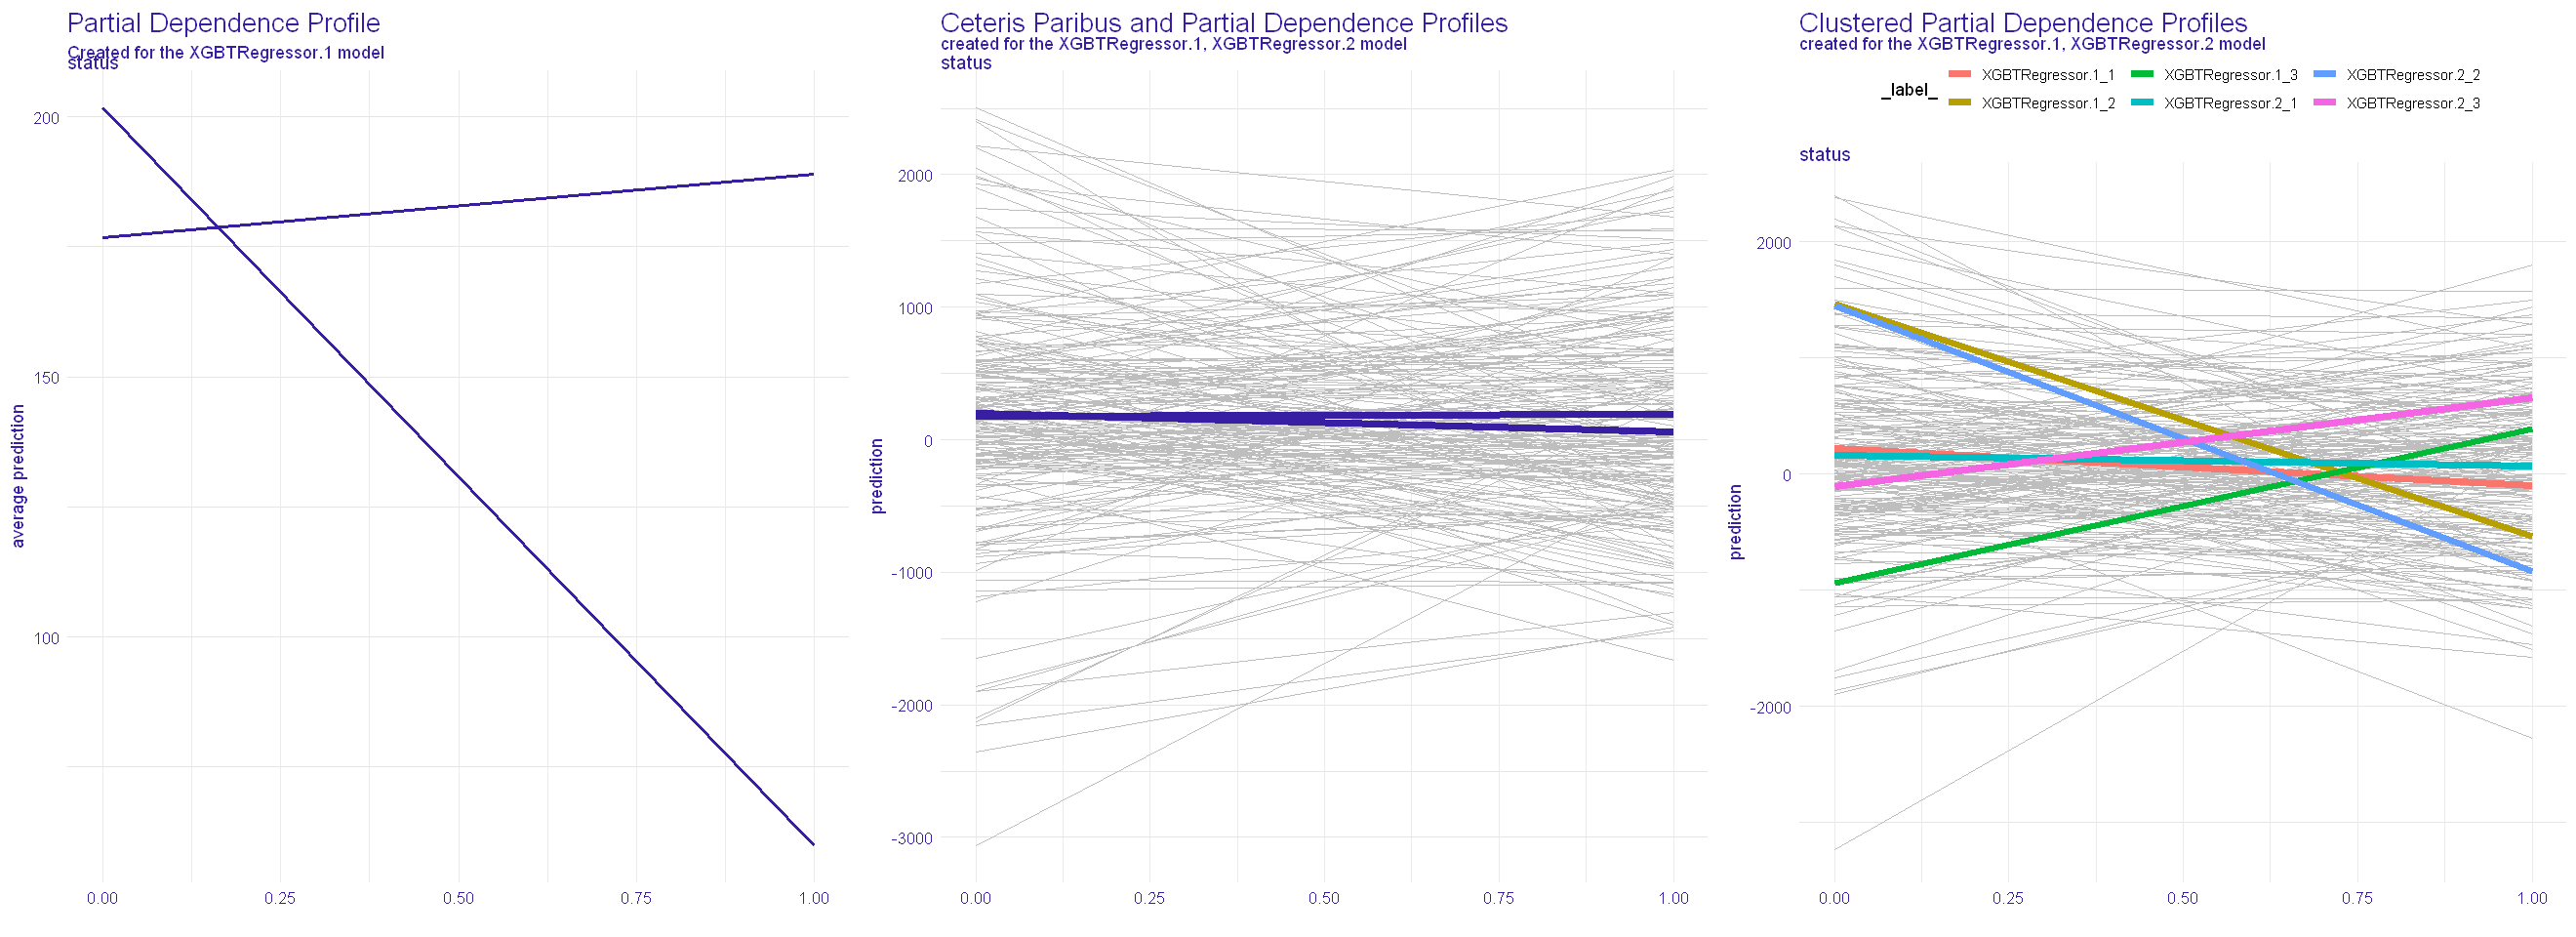

In [62]:
plot_pdp(explainer, "status")

### `nodes`

Warning message in model_name[i] <- unique(dfl[[i]]$`_label`):
"liczba pozycji do zastąpienia nie jest wielokrotnością długości zamiany"


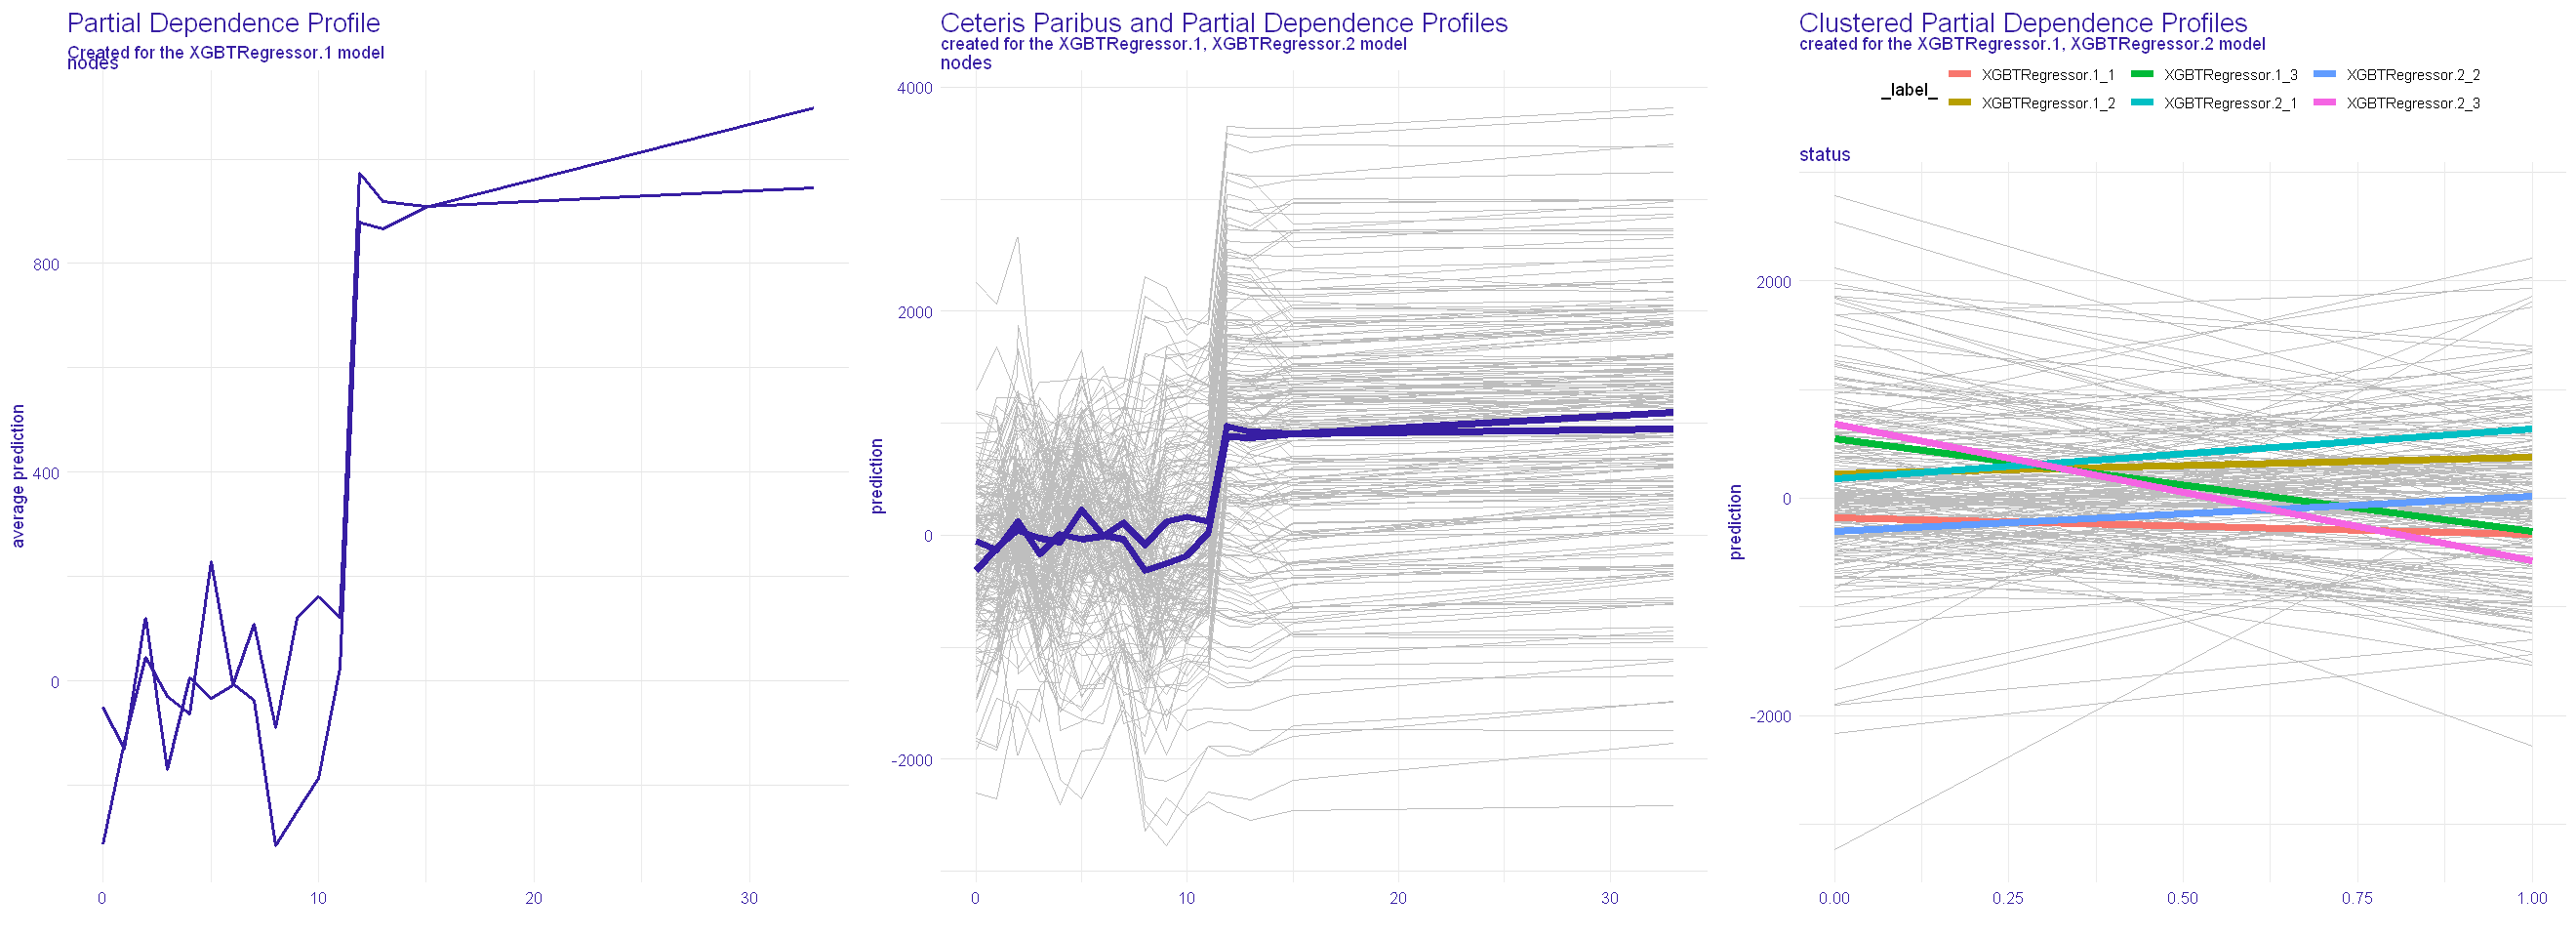

In [63]:
plot_pdp(explainer, "nodes")

### `age`

Warning message in model_name[i] <- unique(dfl[[i]]$`_label`):
"liczba pozycji do zastąpienia nie jest wielokrotnością długości zamiany"


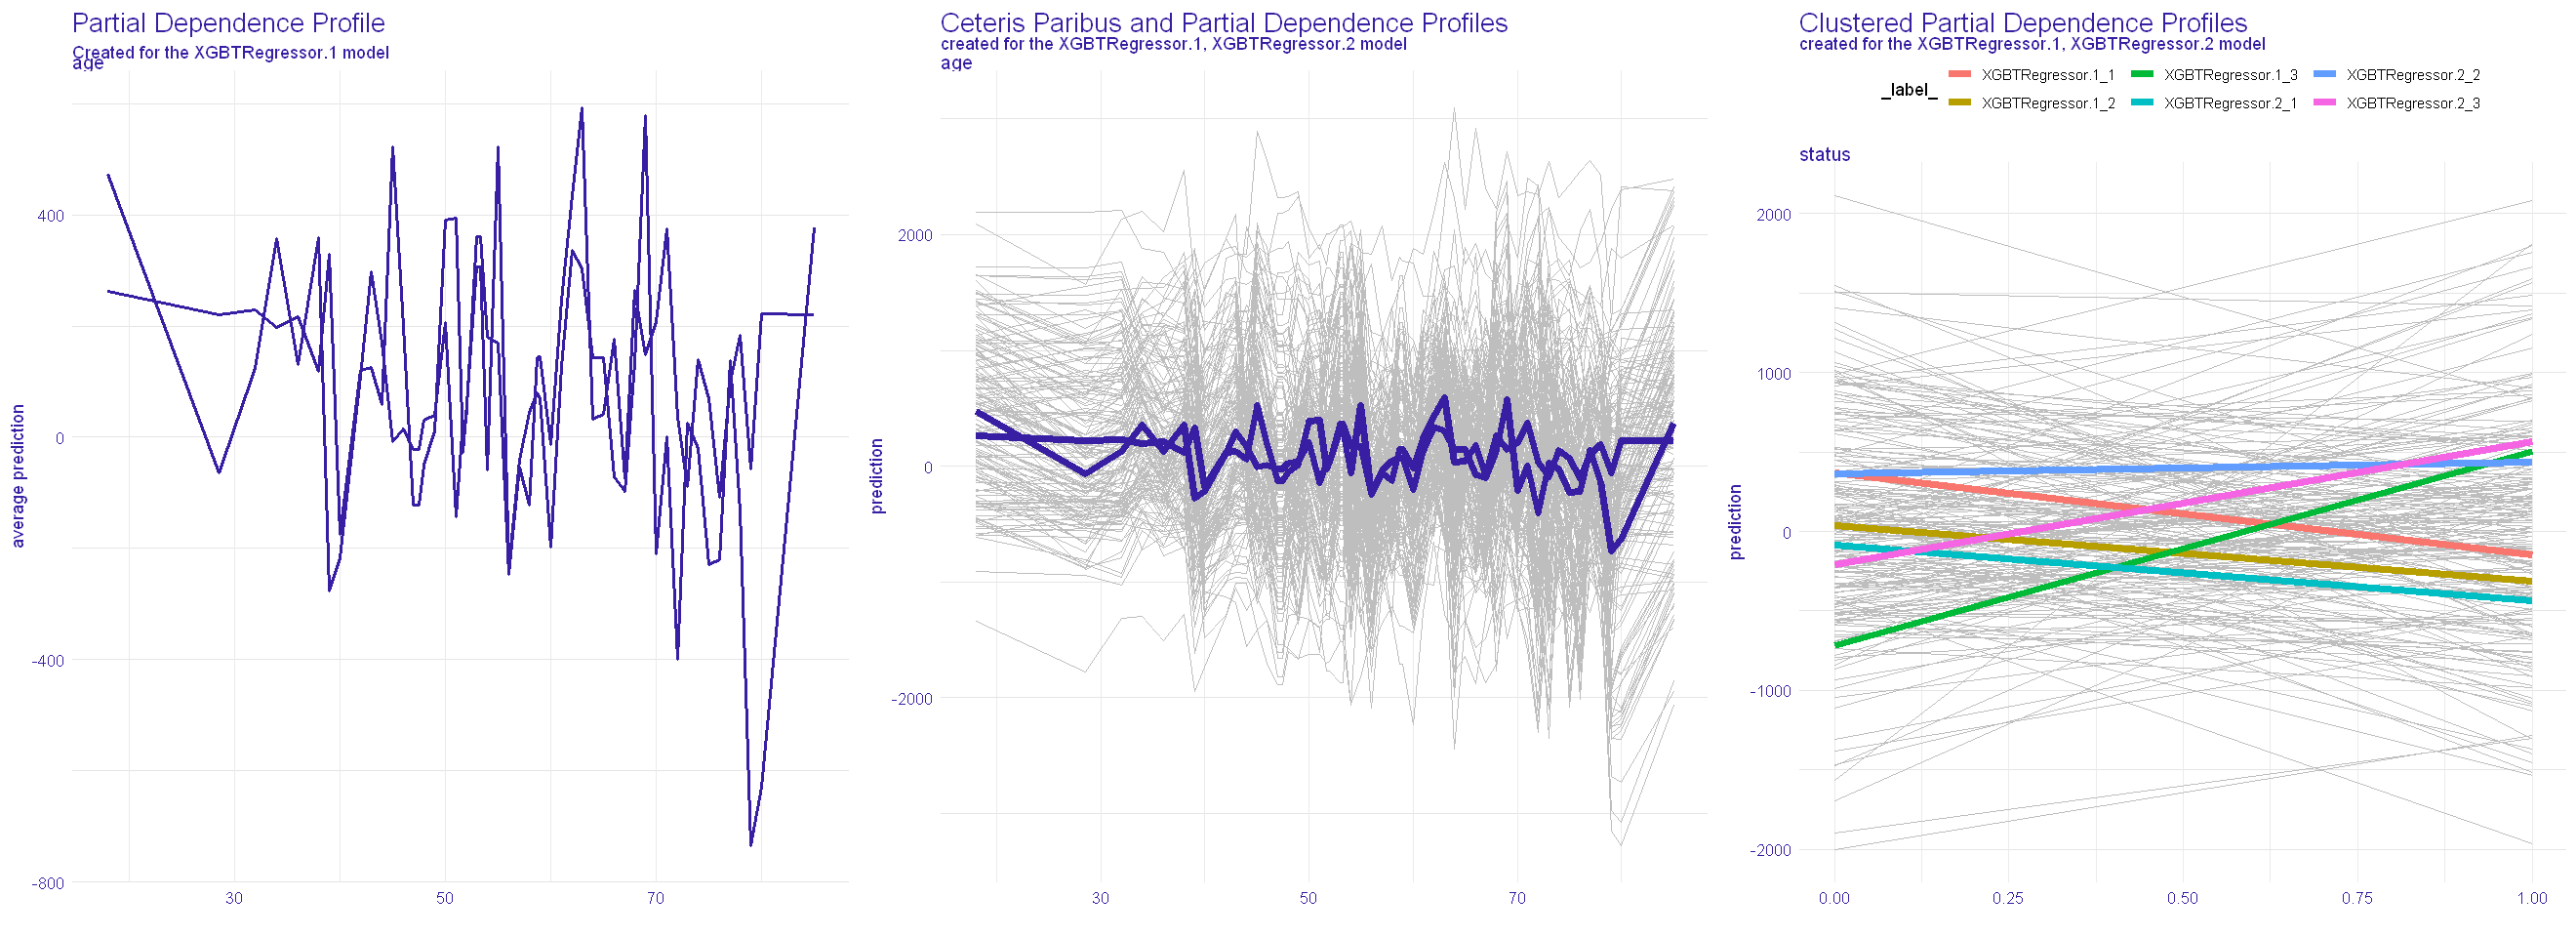

In [65]:
plot_pdp(explainer, "age")

## SHAP

In [69]:
explainer$model_info

Wrapper package: reticulate 
Wrapper package version: 1.15 
Package: scikit-learn 
Package version: unkown 
Task type: regression

Warning message:
"`fun.y` is deprecated. Use `fun` instead."
geom_path: Each group consists of only one observation. Do you need to adjust the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust the group aesthetic?



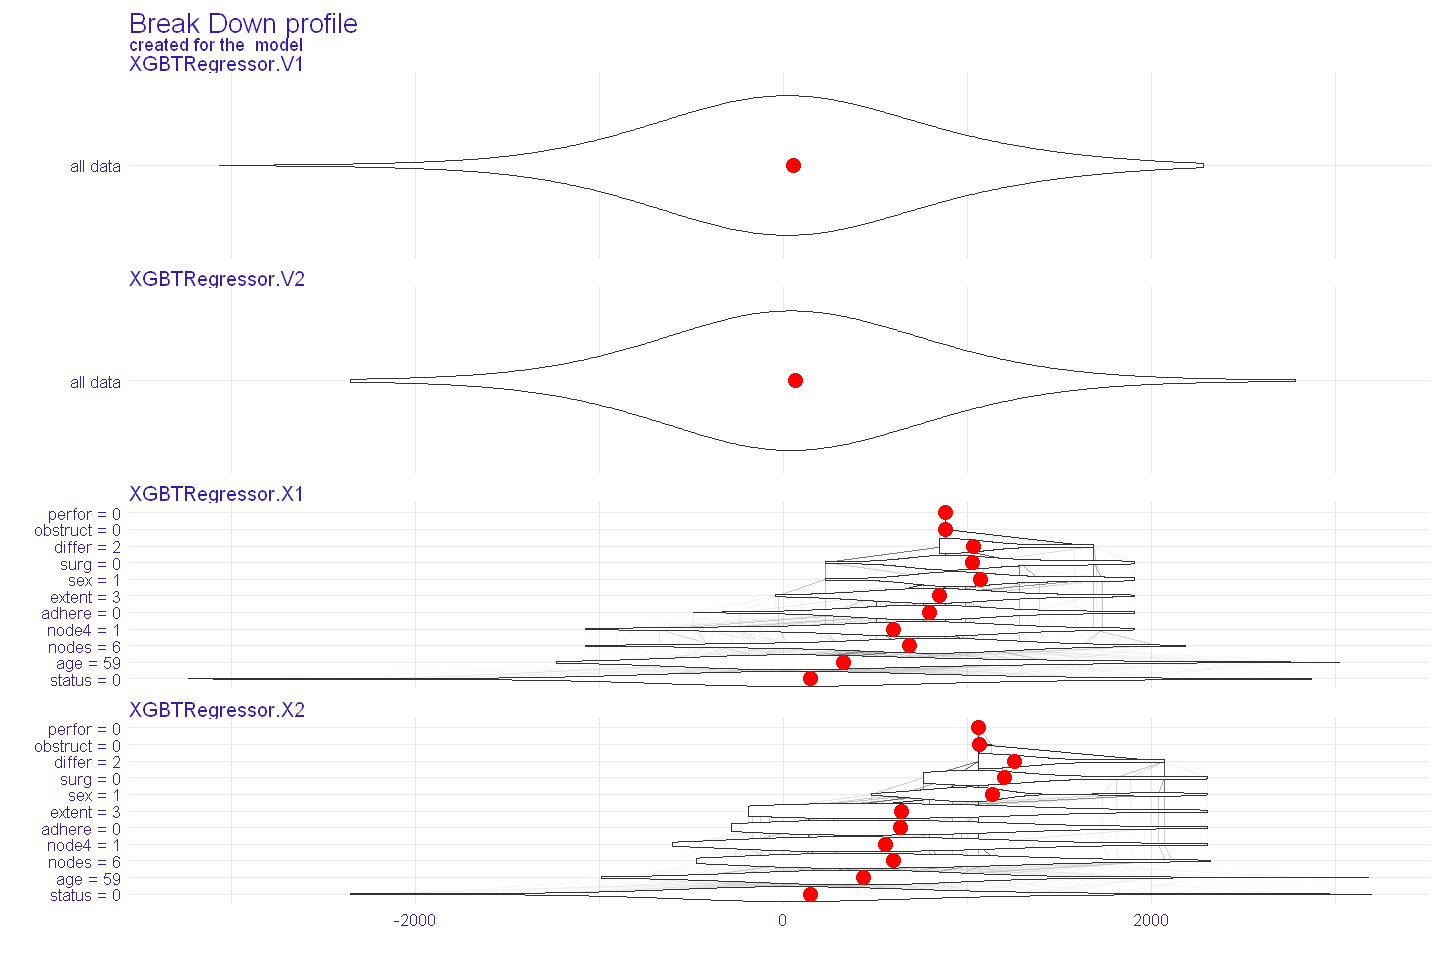

In [70]:
options(repr.plot.width = 12)

plot(
    variable_attribution(
        explainer,
        new_observation = data$X_test[1, ],
        type = "break_down",
        keep_distributions = TRUE
    ),
    plot_distributions = TRUE
) 